In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

The IMDB Spoiler Dataset has two files ie: IMDB Movie Details and IMDB Movie Reviews.

In [2]:
df_reviews = pd.read_json('../input/IMDB_reviews.json', lines=True)

In [3]:
df_details = pd.read_json('../input/IMDB_movie_details.json', lines=True)

In [4]:

df = pd.read_json('../input/IMDB_reviews.json', lines=True)  # Update with your dataset path
df =df.head(10000)

In [5]:
print('User reviews shape: ', df_reviews.shape)
print('Movie details shape: ', df_details.shape)

User reviews shape:  (573913, 7)
Movie details shape:  (1572, 7)


#### User Reviews:
Number of rows: 573,913
Number of columns: 7
#### Movie Details:
Number of rows: 1,572
Number of columns: 7

Top 5 values in User Reviews.

In [6]:
df_reviews.columns

Index(['is_spoiler', 'movie_id', 'rating', 'review_date', 'review_summary',
       'review_text', 'user_id'],
      dtype='object')

Counting the number of Zeros in Reviews.

In [7]:
zero_counts = df_reviews[df_reviews == 0].count()
print(zero_counts)

is_spoiler        422989
movie_id               0
rating                 0
review_date            0
review_summary         0
review_text            0
user_id                0
dtype: int64


is_spoiler has 422989 zeros , as it contains true, false values(0,1)

In [8]:
null_counts = df_reviews.isnull().sum()
print(null_counts)

is_spoiler        0
movie_id          0
rating            0
review_date       0
review_summary    0
review_text       0
user_id           0
dtype: int64


No Null values in the dataset

Top 5 values in Movie Details.

In [9]:
df_details.head()

,duration,genre,movie_id,plot_summary,plot_synopsis,rating,release_date
0,1h 57min,"[Action, Thriller]",tt0105112,"Former CIA analyst, Jack Ryan is in England wi...","Jack Ryan (Ford) is on a ""working vacation"" in...",6.9,1992-06-05
1,1h 45min,[Comedy],tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",Four boys around the age of 10 are friends in ...,6.6,2013-11-01
2,1h 37min,"[Comedy, Romance]",tt0243655,"The setting is Camp Firewood, the year 1981. I...",,6.7,2002-04-11
3,2h 6min,"[Adventure, Drama, Western]",tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,8.3,1948-01-24
4,1h 43min,"[Comedy, Drama, Romance]",tt0126886,Tracy Flick is running unopposed for this year...,Jim McAllister (Matthew Broderick) is a much-a...,7.3,1999-05-07


From the given details of the 5 rows above, I can deduce that there is no benefit to using Movie Details datafile in our Model training.

In [10]:
print('Unique films in reviews dataset:', df_reviews['movie_id'].nunique())

Unique films in reviews dataset: 1572


Plots for each given variable.

In [11]:
# Categorical columns
categorical_columns = ['movie_id', 'rating', 'review_date', 'user_id']

# Text columns
text_columns = ['review_summary', 'review_text']

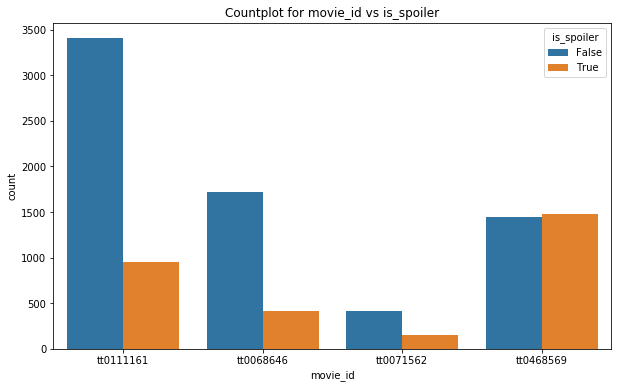

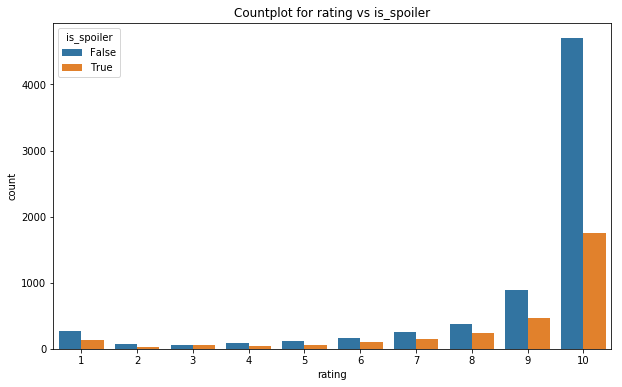

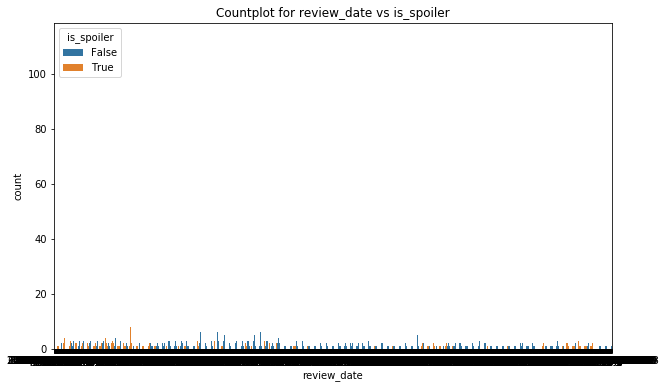

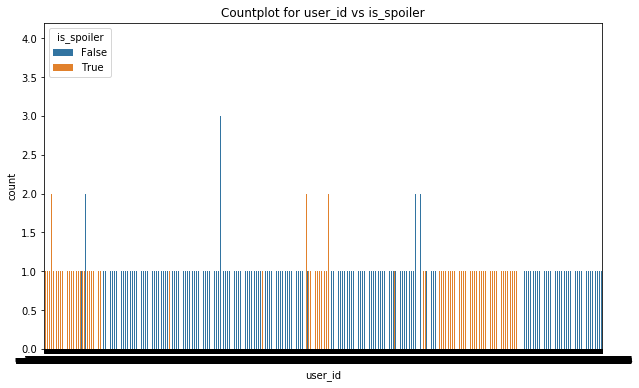

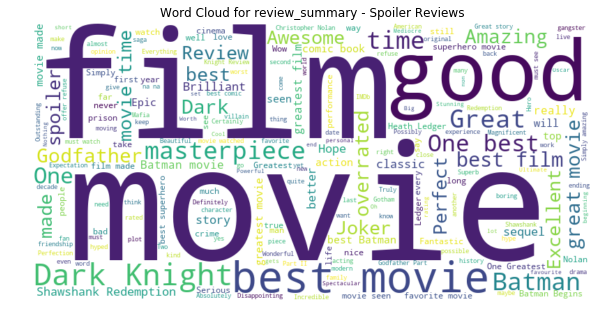

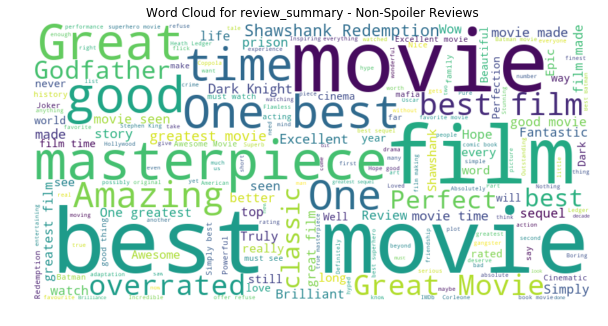

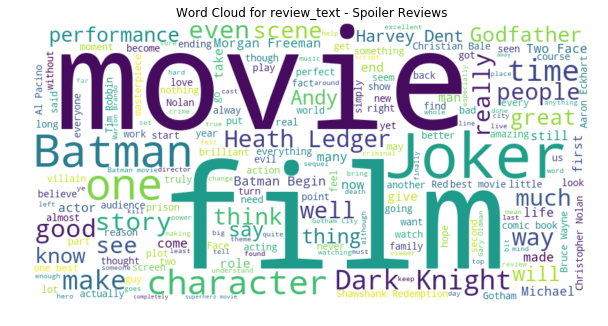

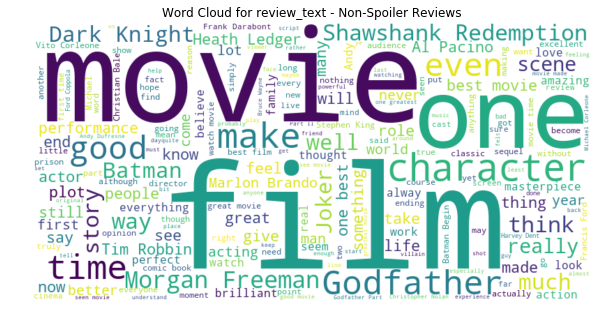

In [12]:
# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='is_spoiler', data=df)
    plt.title(f'Countplot for {col} vs is_spoiler')
    plt.show()

# Plot word clouds for text columns
for col in text_columns:
    plt.figure(figsize=(10, 6))
    text = ' '.join(df[df['is_spoiler'] == True][col])
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {col} - Spoiler Reviews')
    plt.show()

    plt.figure(figsize=(10, 6))
    text = ' '.join(df[df['is_spoiler'] == False][col])
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {col} - Non-Spoiler Reviews')
    plt.show()


Checking the distribution of reviews with spoilers within the dataset.

In [13]:
reviews_meta = pd.DataFrame()
reviews_meta['is_spoiler'] = df_reviews['is_spoiler']
reviews_meta['has_word_spoiler'] = df_reviews['review_text'].apply(lambda text: 1 if 'SPOILER' in text.upper() else 0)

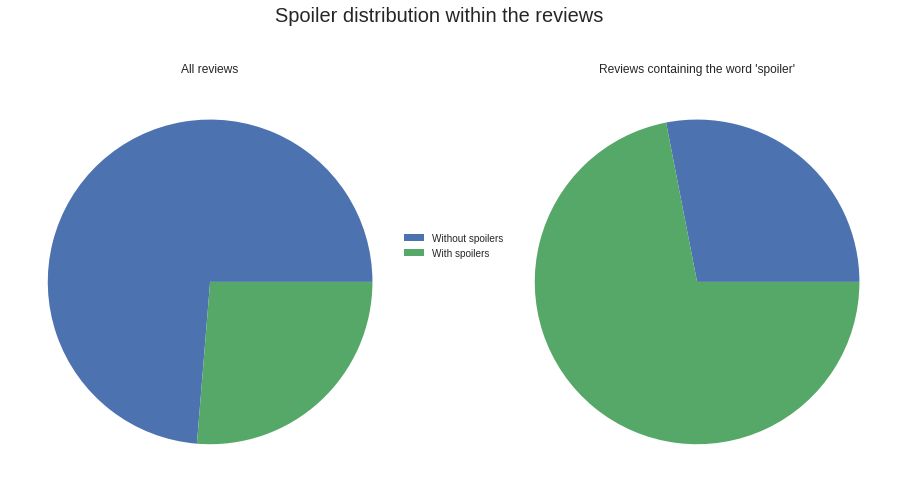

In [14]:
pie1 = reviews_meta['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie2 = reviews_meta[reviews_meta['has_word_spoiler'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(16, 8))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.pie(pie1['is_spoiler'])
    ax1.set_title('All reviews')

    ax2.pie(pie2['is_spoiler'])
    ax2.set_title('Reviews containing the word \'spoiler\'')

    plt.suptitle('Spoiler distribution within the reviews', fontsize=20)
    fig.legend(labels=['Without spoilers', 'With spoilers'], loc='center')

    plt.show()

Distribution of Spoiler Vs no spoiler reviews according to the review length.

In [15]:
reviews_meta['word_count'] = df_reviews['review_text'].apply(lambda text: len(text.split(' ')))

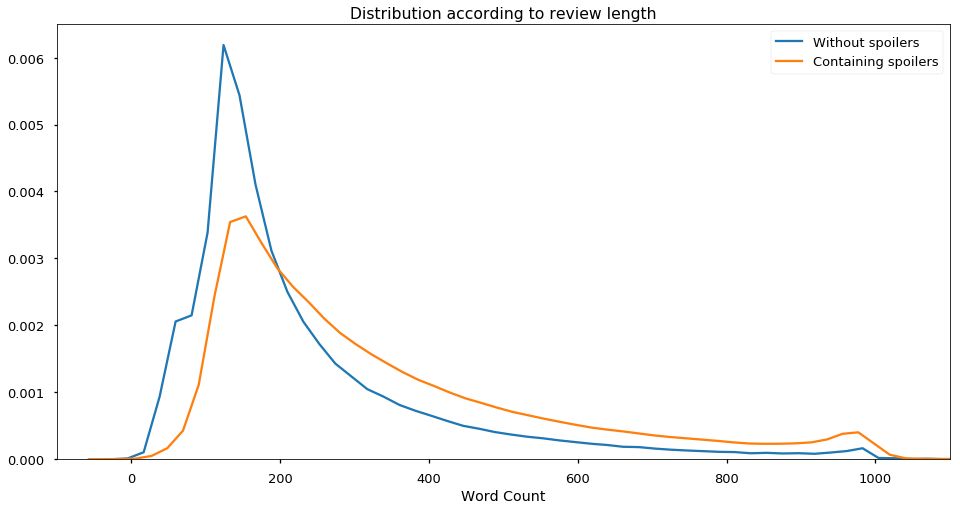

In [16]:
with plt.style.context('seaborn-talk'):
    
    plt.figure(figsize=(16, 8))
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
    plt.legend()
    plt.xlim([-100, 1100])
    plt.xlabel('Word Count')
    plt.title('Distribution according to review length')
    plt.show()

 Distribution of Spoiler Ratio Vs ratings given by the user.
 

In [17]:
overall_spoiler_ratio = df_reviews.is_spoiler.value_counts()[1] / (df_reviews.is_spoiler.value_counts()[0] + df_reviews.is_spoiler.value_counts()[1])
overall_spoiler_ratio

0.26297365628588304

In [18]:
movie_info = df_reviews.is_spoiler.eq(1).groupby(df_reviews['movie_id'])
movie_info = pd.concat([movie_info.size().rename('review_count'), movie_info.sum().astype(int).rename('spoiler_count'), (movie_info.sum() / movie_info.size()).rename('spoiler_rate')], axis=1).reset_index()

In [19]:
rating_info = df_reviews.is_spoiler.eq(1).groupby(df_reviews['rating'])
rating_info = pd.concat([rating_info.size().rename('review_count'), rating_info.sum().astype(int).rename('spoiler_count'), (rating_info.sum() / rating_info.size()).rename('spoiler_rate')], axis=1).reset_index()

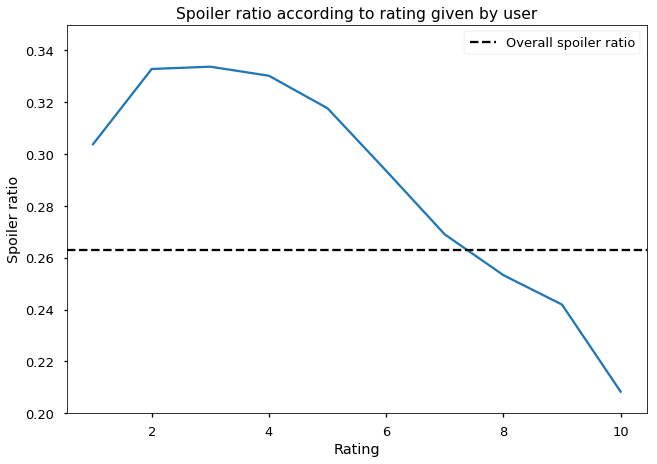

In [20]:
with plt.style.context('seaborn-talk'):
    sns.lineplot(data=rating_info, x='rating', y='spoiler_rate')
    plt.ylim(0.20, 0.35)
    plt.axhline(y=overall_spoiler_ratio, color='black', ls='--', label = 'Overall spoiler ratio')
    plt.title('Spoiler ratio according to rating given by user')
    plt.xlabel('Rating')
    plt.ylabel('Spoiler ratio')
    plt.legend()
    plt.show()

Thus after the given analysis it is safe to assume that reviews_text and is_spoiler are the columns that we need to use to train our models, here we can also assume that is_spoiler is the target variable(label).other columns in the dataframe, dont seem to have a significant impact in determining wether there are spoilers or not in the dataset.